# Project: Predicting Premier League Winners with Random Forest

## Objective
In this project, I aim to build a machine learning pipeline that can predict the winner of the Premier League using team performance data. I’ll collect and prepare historical match statistics, train a Random Forest Classifier, evaluate its accuracy, and finally use the model to forecast which team is most likely to become champion in the current season.

### Step 1: Set up

In [17]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

### Step 2: Load dataset

In [2]:
# Load historical Premier League data
data = pd.read_csv("PremierLeagueSeason2018-2025.csv")

# Display the first few rows of the dataset
data.head()

,Season,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90
0,2025,1,Liverpool,38,25,9,4,86,41,45,84,2.21,82.2,38.6,43.6,1.15
1,2025,2,Arsenal,38,20,14,4,69,34,35,74,1.95,59.9,34.4,25.5,0.67
2,2025,3,Manchester City,38,21,8,9,72,44,28,71,1.87,68.1,47.7,20.4,0.54
3,2025,4,Chelsea,38,20,9,9,64,43,21,69,1.82,67.8,47.3,20.5,0.54
4,2025,5,Newcastle Utd,38,20,6,12,68,47,21,66,1.74,63.8,45.5,18.3,0.48


### Step 3: Data Collection and Preprocessing

In [3]:
data["Champion"] = (data["Rk"] == 1).astype("int")

In [4]:
features = ['W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90']
target = 'Champion'

Split the data into features (X) and target (Y)

In [5]:
X = data[features]
y = data[target]

Split the data into training and testing sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (128, 12)
Testing set shape: (32, 12)


### Step 4: Create and train model

In [7]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=5)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

### Step 5: Display features importance

In [8]:
feature_importance = pd.DataFrame({'feature': features, 'importance': rf_model.feature_importances_})
print(feature_importance.sort_values('importance', ascending=False))

   feature  importance
7   Pts/MP    0.165273
0        W    0.160264
6      Pts    0.127362
2        L    0.105076
5       GD    0.087689
11  xGD/90    0.076390
3       GF    0.069270
4       GA    0.060095
10     xGD    0.041540
8       xG    0.041406
1        D    0.033322
9      xGA    0.032314


<Figure size 1000x600 with 0 Axes>

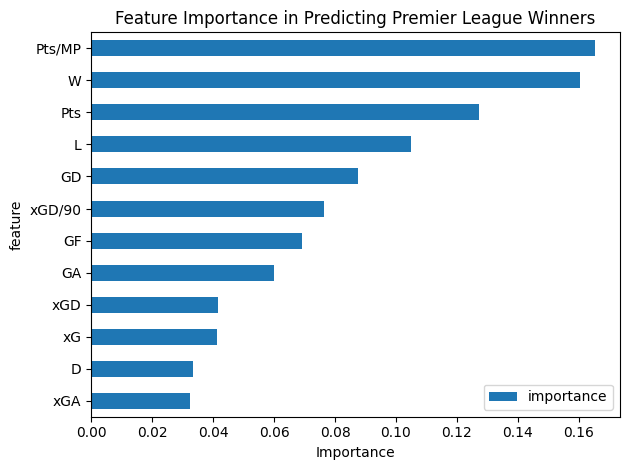

In [9]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importance.sort_values('importance', ascending=True).plot(x='feature', y='importance', kind='barh')
plt.title('Feature Importance in Predicting Premier League Winners')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

### Step 6: Make predictions on test set

In [10]:
y_pred = rf_model.predict(X_test)

Calculate accuracy and display classification report

In [11]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Display classification report
print(classification_report(y_test, y_pred))

Model Accuracy: 0.97
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.50      1.00      0.67         1

    accuracy                           0.97        32
   macro avg       0.75      0.98      0.83        32
weighted avg       0.98      0.97      0.97        32



### Step 7: Hyperparameter Tuning

In [12]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score: 0.97


### Step 8: Making Predictions for the current season

In [13]:
# Load current season data as of matchweek 4
current_season = pd.read_csv("PremierLeagueSeason2026.csv")

# Make predictions for the current season
predictions = grid_search.best_estimator_.predict_proba(current_season[features])

# Display top 5 teams with highest probabilities
top_5 = pd.DataFrame({'Squad': current_season['Squad'], 'Win_Probability': predictions[:, 1]})
print(top_5.sort_values('Win_Probability', ascending=False).head())

         Squad  Win_Probability
0    Liverpool         0.310395
1      Arsenal         0.303918
2    Tottenham         0.285252
3  Bournemouth         0.285252
4      Chelsea         0.180794


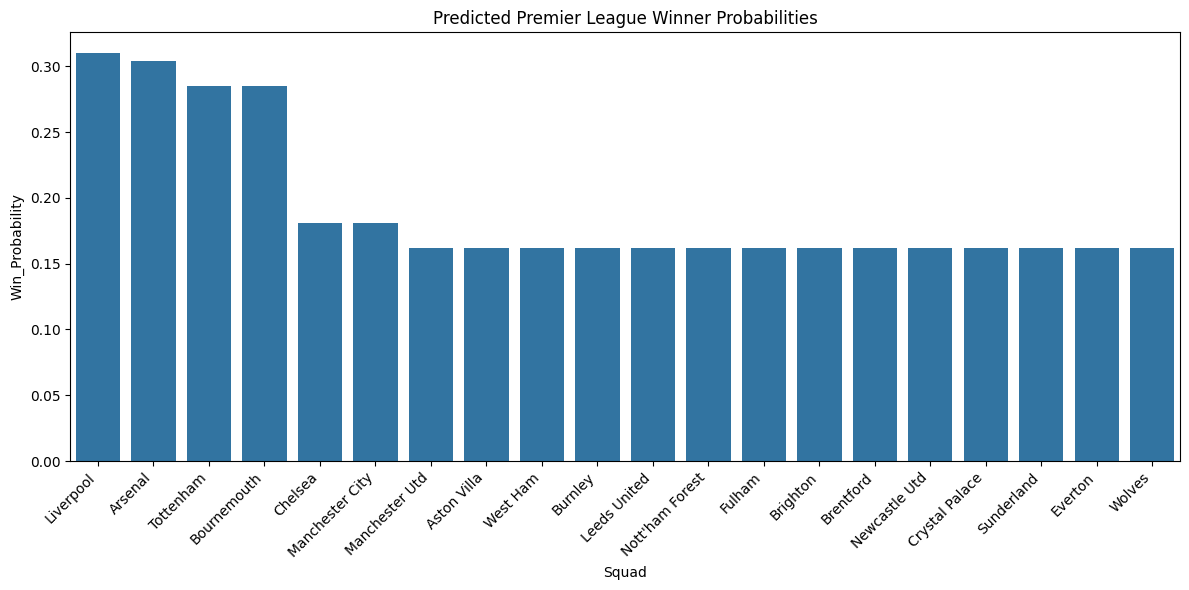

In [18]:
import seaborn as sns

# Create a bar plot of win probabilities
plt.figure(figsize=(12, 6))
sns.barplot(x='Squad', y='Win_Probability', data=top_5.sort_values('Win_Probability', ascending=False))
plt.title('Predicted Premier League Winner Probabilities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Step 9: Save model

In [19]:
import joblib
joblib.dump(grid_search.best_estimator_, 'premier_league_winner_model.pkl')

['premier_league_winner_model.pkl']